<a href="https://colab.research.google.com/github/joaquincdlg/challenge1-data-science-latam/blob/main/alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


#1. Análisis de facturación



##**Ingreso total por cada tienda**

<Axes: title={'center': 'Total de Ventas por Tienda'}, xlabel='Tienda'>

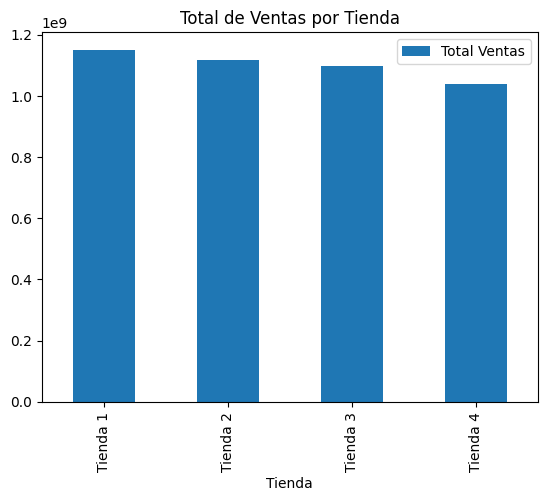

In [3]:
ventas=tienda["Precio"].sum()
ventas2=tienda2["Precio"].sum()
ventas3=tienda3["Precio"].sum()
ventas4=tienda4["Precio"].sum()

#No se puede graficar directamente porque son 4 DF distintos, por eso los agrupo en 1

ventas_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Total Ventas': [ventas, ventas2, ventas3, ventas4]
})
ventas_totales.plot(x='Tienda', y='Total Ventas', kind='bar', title='Total de Ventas por Tienda')


# 2. Ventas por categoría

<Axes: title={'center': 'Ventas por Categoría'}, xlabel='Categoría del Producto'>

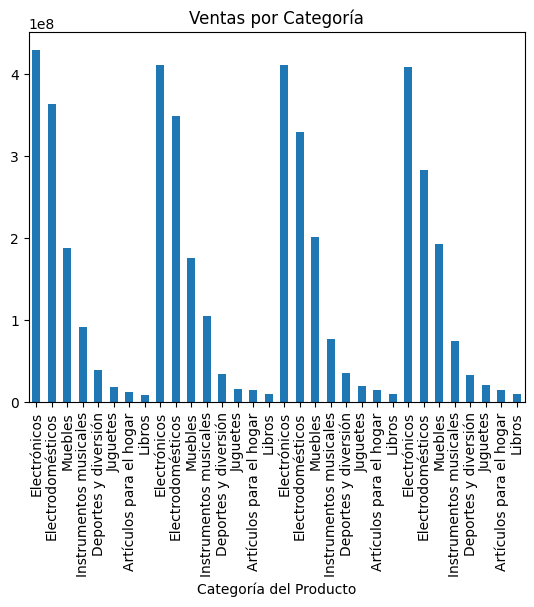

In [4]:
venta_por_categoria=tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_por_categoria2=tienda2.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_por_categoria3=tienda3.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_por_categoria4=tienda4.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_por_categoria_total=pd.concat([venta_por_categoria,ventas_por_categoria2,ventas_por_categoria3,ventas_por_categoria4])
ventas_por_categoria_total.plot(kind="bar", title="Ventas por Categoría")

#podría haber hecho un gr´fico por tienda pero asi me permite comparar entre las diferentes tiendas aunque la division no sea clara; al ser solamente 4 tiendas en este caso particular, no es caótico compararlas



<Axes: title={'center': 'Cantidad de Productos por Categoría'}, xlabel='Categoría del Producto'>

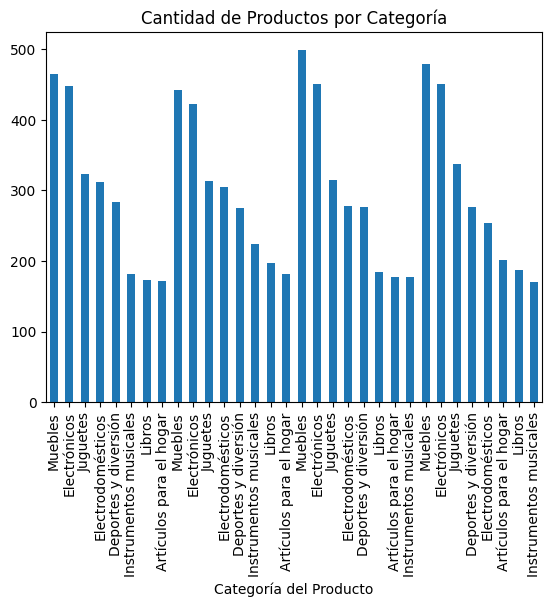

In [5]:
cantidad_categoria=tienda.value_counts("Categoría del Producto")
cantidad_categoria2=tienda2.value_counts("Categoría del Producto")
cantidad_categoria3=tienda3.value_counts("Categoría del Producto")
cantidad_categoria4=tienda4.value_counts("Categoría del Producto")
cantidad_categoria=pd.concat([cantidad_categoria,cantidad_categoria2,cantidad_categoria3,cantidad_categoria4])
cantidad_categoria.plot(kind="bar", title="Cantidad de Productos por Categoría")

# 3. Calificación promedio de la tienda


,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


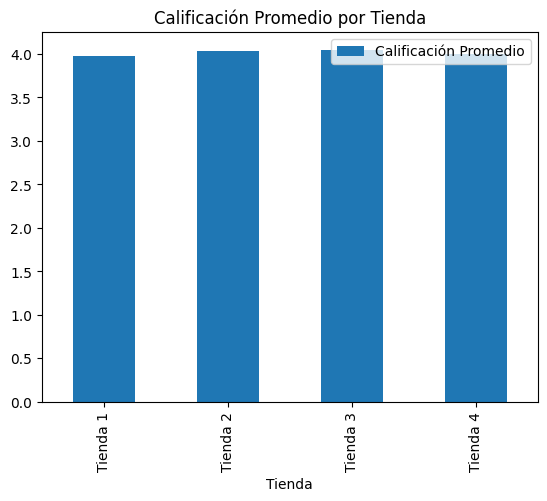

In [7]:
calificacion=tienda["Calificación"].mean()
calificacion2=tienda2["Calificación"].mean()
calificacion3=tienda3["Calificación"].mean()
calificacion4=tienda4["Calificación"].mean()
calificacion_total=pd.DataFrame({
    "Tienda":["Tienda 1","Tienda 2","Tienda 3","Tienda 4"],
    "Calificación Promedio":[calificacion,calificacion2,calificacion3,calificacion4]
})
calificacion_total.plot(x="Tienda", y="Calificación Promedio", kind="bar", title="Calificación Promedio por Tienda", )
calificacion_total


# 4. Productos más y menos vendidos

###**Tienda 1**

<Axes: title={'center': 'Productos más vendidos Tienda 1'}, xlabel='Producto'>

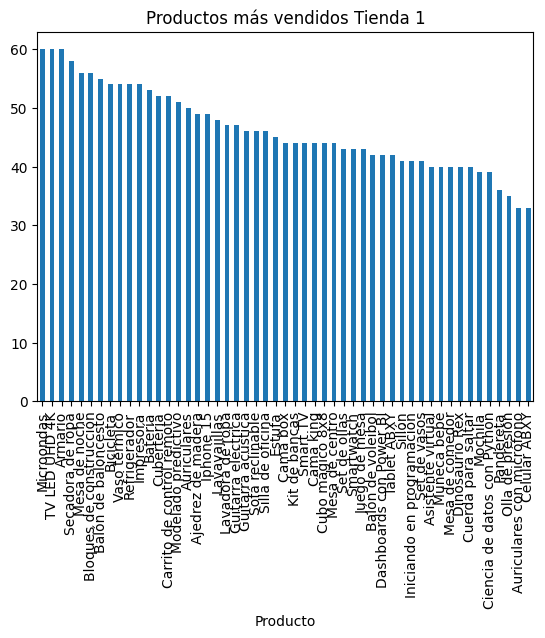

In [19]:
mas_vendidos1=tienda.Producto.value_counts()
mas_vendidos2=tienda2.Producto.value_counts()
mas_vendidos3=tienda3.Producto.value_counts()
mas_vendidos4=tienda4.Producto.value_counts()

mas_vendidos1.plot(kind="bar", title="Productos más vendidos Tienda 1")


<Axes: title={'center': 'Productos más vendidos Tienda 2'}, xlabel='Producto'>

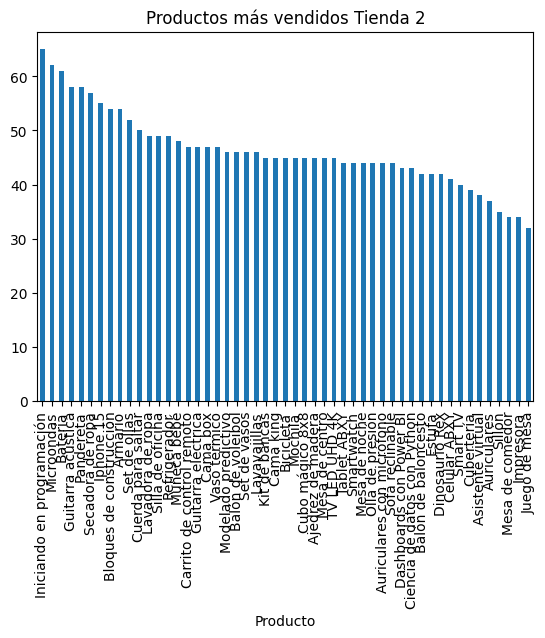

In [20]:
mas_vendidos2.plot(kind="bar", title="Productos más vendidos Tienda 2")


<Axes: title={'center': 'Productos más vendidos Tienda 3'}, xlabel='Producto'>

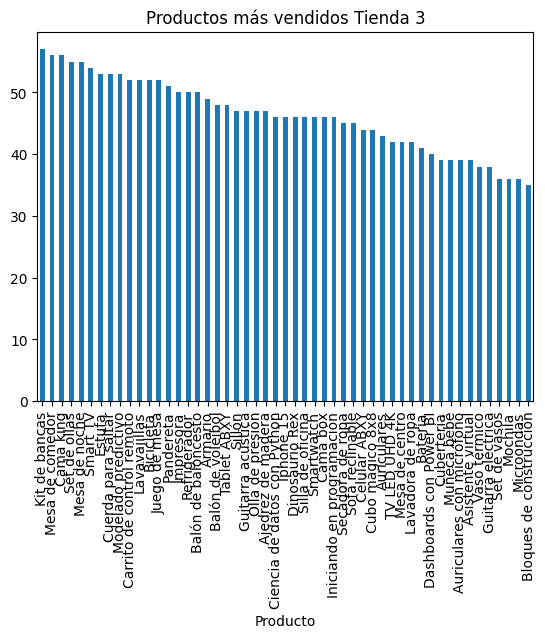

In [21]:
mas_vendidos3.plot(kind="bar", title="Productos más vendidos Tienda 3")

<Axes: title={'center': 'Productos más vendidos Tienda 4'}, xlabel='Producto'>

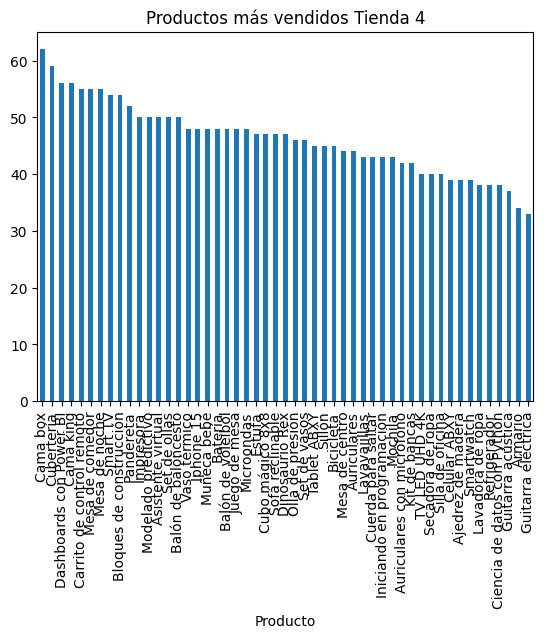

In [22]:
mas_vendidos4.plot(kind="bar", title="Productos más vendidos Tienda 4")

# 5. Envío promedio por tienda

In [26]:
tienda["Costo de envío"].mean()

np.float64(26018.60958033065)

In [27]:
tienda2["Costo de envío"].mean()

np.float64(25216.235693090293)

In [28]:
tienda3["Costo de envío"].mean()

np.float64(24805.680373039424)

In [29]:
tienda4["Costo de envío"].mean()

np.float64(23459.457167090754)